# Parkhäuser in Bern
Seit Sommer 2019 werden halbstündlich die Informationen zu den freien Parkplätzen in Berner Parkhäusern ausgelesen, wie sie auf [Parking-Bern.ch](http://www.parking-bern.ch/d/index.php) angegeben werden. Diese Daten werden untenstehend aufbereitet und ausgewertet. Hinweis: Im Frühjahr 2020 kam es beim Scraper zu einem Ausfall. Deshalb liegen für die drei Wochen direkt vor dem Shutdown keine Daten vor. 

**Datenquelle:** http://www.parking-bern.ch/d/index.php

**Verantwortlich:** Michael Bucher (Text), Mathias Born (Datenauswertung) 

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datenaufbereitung" data-toc-modified-id="Datenaufbereitung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datenaufbereitung</a></span></li><li><span><a href="#Datenkontrolle" data-toc-modified-id="Datenkontrolle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datenkontrolle</a></span></li><li><span><a href="#Auswertungen" data-toc-modified-id="Auswertungen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Auswertungen</a></span><ul class="toc-item"><li><span><a href="#Grundsätzliches" data-toc-modified-id="Grundsätzliches-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Grundsätzliches</a></span></li><li><span><a href="#Auslastung-generell" data-toc-modified-id="Auslastung-generell-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Auslastung generell</a></span></li><li><span><a href="#Tagesverlauf" data-toc-modified-id="Tagesverlauf-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tagesverlauf</a></span></li><li><span><a href="#Vor--und-während-Corona" data-toc-modified-id="Vor--und-während-Corona-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Vor- und während Corona</a></span></li></ul></li><li><span><a href="#Exporte" data-toc-modified-id="Exporte-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exporte</a></span><ul class="toc-item"><li><span><a href="#Grafik:-Auslastungshitparade" data-toc-modified-id="Grafik:-Auslastungshitparade-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Grafik: Auslastungshitparade</a></span></li><li><span><a href="#Grafik:-Auslastung-vor-und-während-Corona" data-toc-modified-id="Grafik:-Auslastung-vor-und-während-Corona-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grafik: Auslastung vor und während Corona</a></span></li><li><span><a href="#Grafik:-Auslastung-im-Laufe-der-Zeit" data-toc-modified-id="Grafik:-Auslastung-im-Laufe-der-Zeit-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Grafik: Auslastung im Laufe der Zeit</a></span></li><li><span><a href="#Grafik:-Belegung-Tagesverlauf" data-toc-modified-id="Grafik:-Belegung-Tagesverlauf-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Grafik: Belegung Tagesverlauf</a></span></li><li><span><a href="#Grafik:-Belegung-Wochenverlauf" data-toc-modified-id="Grafik:-Belegung-Wochenverlauf-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Grafik: Belegung Wochenverlauf</a></span></li></ul></li><li><span><a href="#Textfragmente" data-toc-modified-id="Textfragmente-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Textfragmente</a></span><ul class="toc-item"><li><span><a href="#Kasten" data-toc-modified-id="Kasten-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Kasten</a></span></li></ul></li></ul></div>

## Datenaufbereitung

In [1]:
# Importieren und Konfigurieren der nötigen Erweiterungen. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Aktualisieren der Daten. 
!rsync do2:/root/verkehr/daten/be_parkhäuser.csv daten/

In [3]:
# Einlesen der Daten. 
df = pd.read_csv('daten/be_parkhäuser.csv', error_bad_lines=False, header=None)

# Aufbereiten der Daten. 
df.columns = ['parking', 'datetime', 'kapazität', 'frei']
df = df[df['frei'] != '---']
df['kapazität'] = df['kapazität'].astype('int')
df['frei'] = df['frei'].astype('int')
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)

b'Skipping line 90343: expected 4 fields, saw 5\nSkipping line 90434: expected 4 fields, saw 5\nSkipping line 92725: expected 4 fields, saw 5\nSkipping line 92816: expected 4 fields, saw 6\nSkipping line 94100: expected 4 fields, saw 5\nSkipping line 94283: expected 4 fields, saw 5\nSkipping line 95474: expected 4 fields, saw 7\nSkipping line 95749: expected 4 fields, saw 5\nSkipping line 95932: expected 4 fields, saw 5\nSkipping line 96023: expected 4 fields, saw 5\nSkipping line 96206: expected 4 fields, saw 6\nSkipping line 96481: expected 4 fields, saw 5\nSkipping line 102075: expected 4 fields, saw 5\n'
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Die Anzahl belegter Plätze wird berechnet. 
df['belegt'] = df['kapazität'] - df['frei']

In [5]:
# Die Auslastung in Prozent wird berechnet. 
df['auslastung'] = 100 - (100 * df['frei'] / df['kapazität'])

In [6]:
# Einige fehlerhafte Einträge in den Daten werden entfernt. 
df_temp = df.groupby(by='parking').count()[['kapazität']]
df_temp = df_temp[df_temp['kapazität'] == 1].index.tolist()
df = df[~df['parking'].isin(df_temp)]

## Datenkontrolle
Der Scraper sollte alle 30 Minuten die Werte auslesen. Im Folgenden wird geprüft, ob alle nötigen Angaben verfügbar sind. 

In [7]:
# Ein erster Blick auf die ersten paar Zeilen. 
df.head()

,parking,kapazität,frei,belegt,auslastung
datetime,,,,,
2019-07-03 13:57:44,Bahnhof Parking,598,59,539,90.133779
2019-07-03 13:57:44,Metro Parking,425,23,402,94.588235
2019-07-03 13:57:44,Rathaus Parking,580,340,240,41.379310
2019-07-03 13:57:44,Parking City-West,430,0,430,100.000000
2019-07-03 13:57:44,Mobiliar Parking,90,1,89,98.888889


In [8]:
# Wie viele Einträge sind vorhanden? 
len(df)

132799

In [9]:
# Wie viele Werte gibts pro Parkhaus? 
df.groupby(by='parking')[['auslastung']].count()

,auslastung
parking,
Bahnhof Parking,15629
Casinoparking,15631
Kursaal Parking,7736
Metro Parking,15640
Mobiliar Parking,15632
Park + Ride Neufeld,15630
Parking City-West,15634
Rathaus Parking,15638
expo Parking,15629


In [10]:
# Welche Parkhäuser sind verzeichnet? 
df['parking'].unique()

array(['Bahnhof Parking', 'Metro Parking', 'Rathaus Parking',
       'Parking City-West', 'Mobiliar Parking', 'Casinoparking',
       'expo Parking', 'Park + Ride Neufeld', 'Kursaal Parking'],
      dtype=object)

In [11]:
# Wann wurden die Daten zum ersten Mal ausgelesen? 
df.index.min()

Timestamp('2019-07-03 13:57:44')

In [12]:
# Welches ist der letzte ausgewertete Zeitpunkt?
df.index.max()

Timestamp('2020-06-05 11:59:26')

In [13]:
# Wie viele Einträge gibts pro Tag? (Erwartet werden pro Tag 432 Werte: 24 Stunden * 2 Werte * 9 Parkhäuser.)
# In der Anfangsphase war das Kursaal-Parking noch nicht in den Daten enthalten. 
df.resample('D')[['auslastung']].count()

,auslastung
datetime,
2019-07-03,168
2019-07-04,384
2019-07-05,384
2019-07-06,384
2019-07-07,384
...,...
2020-06-01,432
2020-06-02,432
2020-06-03,432


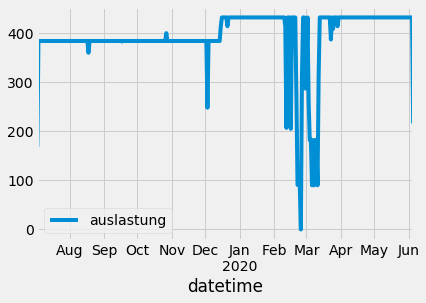

In [14]:
# Gibts Lücken in den Daten? Hier wird geprüft, wie viele Messwerte pro Tag vorhanden sind. Idealerweise
# wären es immer gleich viele. Entstehen können die Datenlücken durch ein Problem beim Anbieter oder durch 
# technische Probleme beim Scraping.
df.resample('D')[['auslastung']].count().plot()

In [15]:
# Offenbar bestehen Datenlücken im Frühjahr dieses Jahres. Um die Werte nicht zu verfälschen, werden
# die entsprechenden Daten komplett gelöscht. 
df_temp = df.loc[:'2019-12-02']
df_temp = df_temp.append(df.loc['2019-12-04':'2020-02-10'])
df_temp = df_temp.append(df.loc['2020-03-13':])
df_temp = df_temp.resample('D')[['auslastung']].count()

# Tage mit nicht kompletten Daten werden entfernt. 
df_temp = df_temp[df_temp['auslastung'] > 300]

# Der erste und der aktuelle Tag werden entfernt. 
df_temp = df_temp.iloc[1:-1]

# Eine Liste mit den validen Daten wird generiert. 
temp_list = df_temp.index.tolist()
temp_list = [str(x.date()) for x in temp_list]

df_temp_2 = pd.DataFrame()

for i in temp_list:
    df_temp_2 = df_temp_2.append(df.loc[i])
    
df = df_temp_2.copy()

## Auswertungen

### Grundsätzliches

In [16]:
# Wie viele Einträge sind vorhanden? 
len(df)

122989

In [17]:
# Welches ist der erste Eintrag?
df.index.min()

Timestamp('2019-07-05 00:29:03')

In [18]:
# Welches ist der letzte Eintrag?
df.index.max()

Timestamp('2020-06-03 23:59:07')

In [19]:
# Wie viele Werte gibts pro Parkhaus? 
df.groupby(by='parking')[['auslastung']].count()

,auslastung
parking,
Bahnhof Parking,14531
Casinoparking,14531
Kursaal Parking,6738
Metro Parking,14532
Mobiliar Parking,14532
Park + Ride Neufeld,14531
Parking City-West,14532
Rathaus Parking,14532
expo Parking,14530


In [20]:
# Wann sind die ersten Einträge zum Kurssal-Parking enthalten?  
df[df['parking'] == 'Kursaal Parking'].index.min()

Timestamp('2019-12-15 09:29:36')

In [93]:
# Wie viele Parkplätze gibts in den Parkhäusern? 
df.loc['2020-06-03 23:59:07']['kapazität'].sum()

4121

### Auslastung generell

In [21]:
# Wie hoch ist die durchschnittliche Auslastung der Berner Parkhäuser? 
df['auslastung'].mean()

36.52960867449147

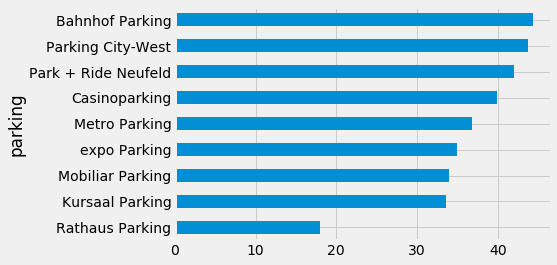

In [22]:
# Wie hoch ist die durchschnittliche Auslastung pro Parkhaus? Die Grafik.
df.groupby(by='parking')['auslastung'].mean().sort_values().plot(kind='barh')

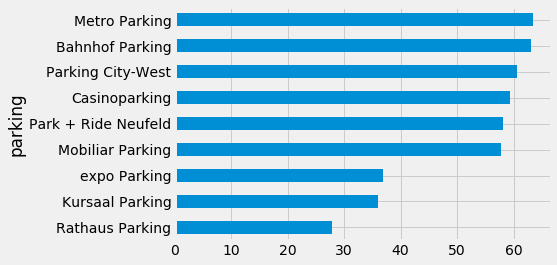

In [23]:
# Wie hoch ist die durchschnittliche Auslastung unter tags (8 bis 18 Uhr) pro Parkhaus?
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]

df_temp.groupby(by='parking')['auslastung'].mean().sort_values().plot(kind='barh')

In [24]:
# Wie hoch ist die durchschnittliche Auslastung pro Parkhaus? Die Daten.
df.groupby(by='parking')['auslastung'].mean().sort_values()

parking
Rathaus Parking        17.981250
Kursaal Parking        33.577100
Mobiliar Parking       33.968942
expo Parking           34.898591
Metro Parking          36.816081
Casinoparking          39.887785
Park + Ride Neufeld    42.007398
Parking City-West      43.727668
Bahnhof Parking        44.319054
Name: auslastung, dtype: float64

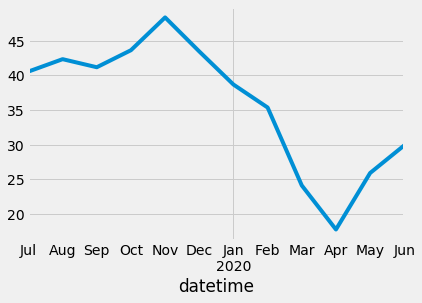

In [25]:
# Die durchschnittliche Tagesauslastung pro Tag aller Parkhäuser im Verlauf der Zeit. (Durchschnitt pro Monat)
df.resample('M')['auslastung'].mean().plot()

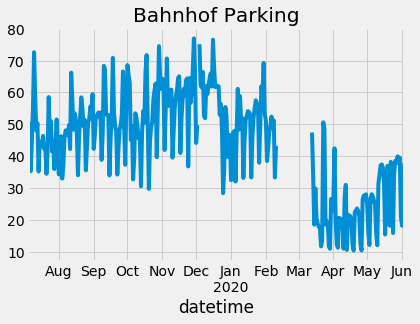

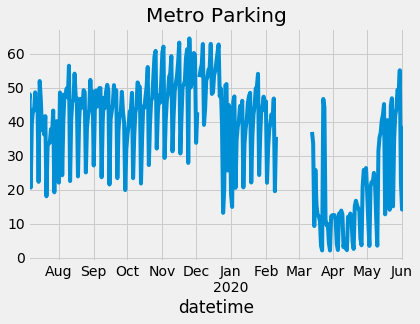

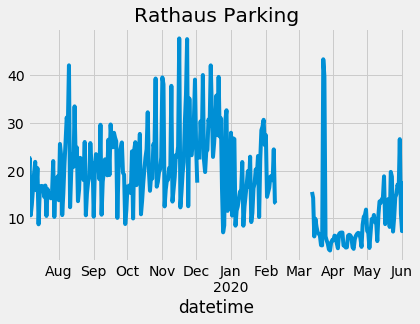

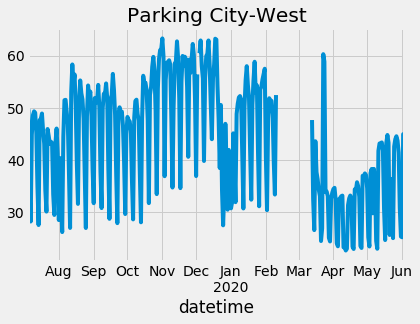

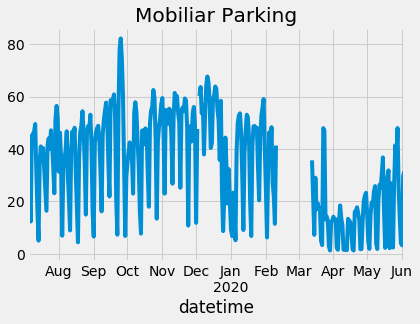

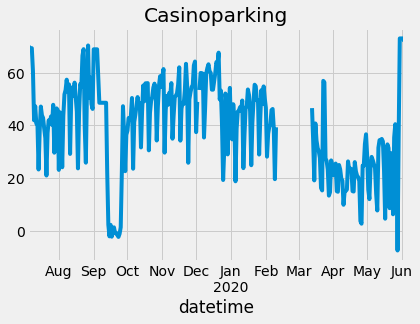

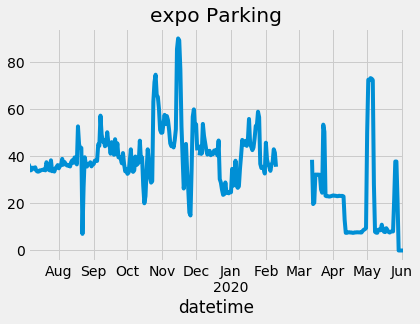

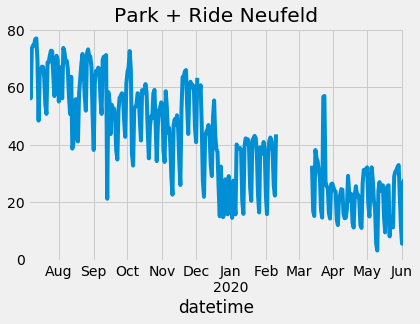

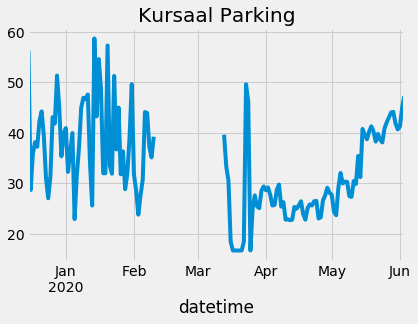

In [26]:
# Die durchschnittliche Auslastung (ganzer Tag) der einzelnen Parkhäuser im Verlauf der Zeit. 
for p in df['parking'].unique():
    fig, ax= plt.subplots()
    df[df['parking'] == p].resample('D')['auslastung'].mean().plot(ax=ax, title=p)
    plt.show()

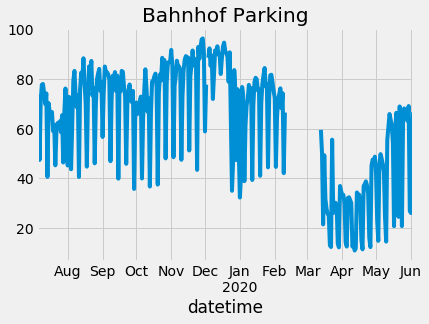

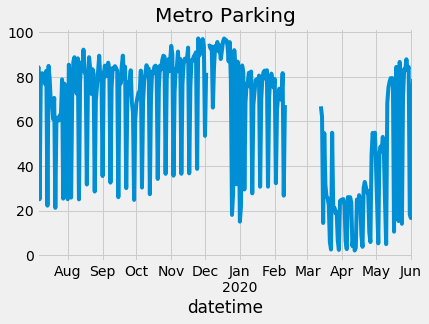

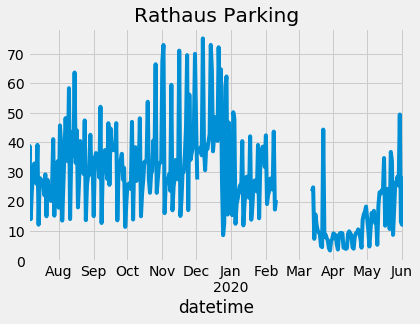

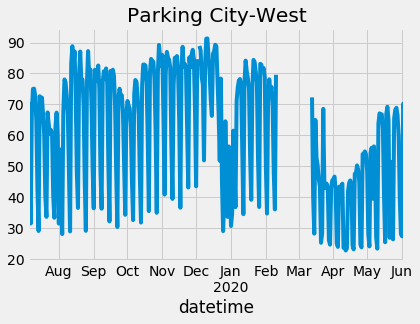

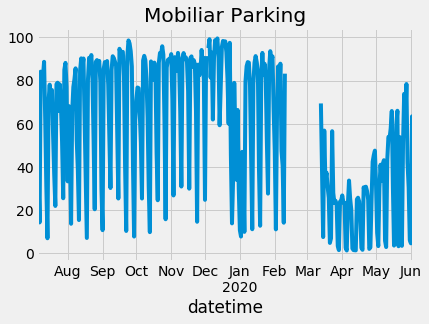

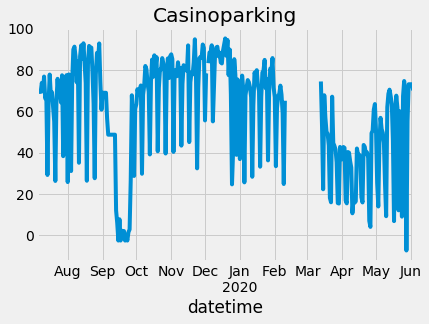

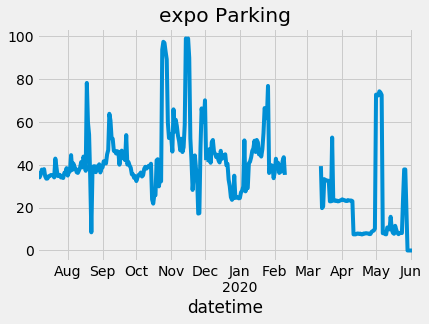

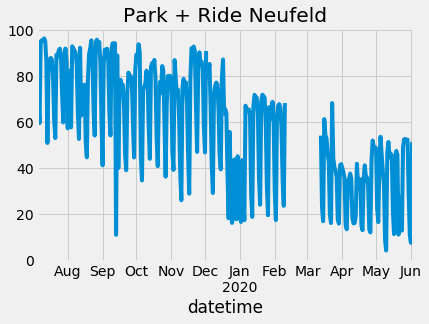

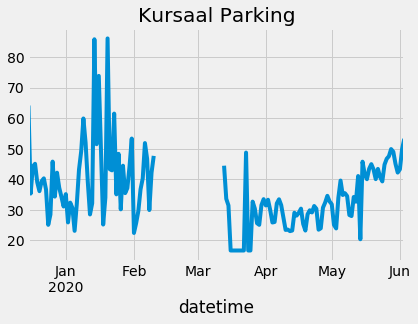

In [27]:
# Die durchschnittliche Auslastung (nur Arbeitstag zwischen 8 und 18 Uhr) der einzelnen Parkhäuser. 

df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]

for p in df_temp['parking'].unique():
    fig, ax= plt.subplots()
    df_temp[df_temp['parking'] == p].resample('D')['auslastung'].mean().plot(ax=ax, title=p)
    plt.show()

In [28]:
# Wie häufig sind die einzelnen Parkhäuser zu 75 Prozent oder mehr ausgelastet?
df_temp = df[df['auslastung'] >= 75]
df_temp = df_temp.groupby(by='parking')[['auslastung']].count()
df_temp_2 = df.groupby(by='parking')['kapazität'].count()
df_temp = pd.merge(df_temp, df_temp_2, left_index=True, right_index=True)
df_temp.columns = ['hohe_auslastung', 'anz_messungen']
df_temp['prozent'] = 100 * df_temp['hohe_auslastung'] / df_temp['anz_messungen']
df_temp['prozent'] = df_temp['prozent'].apply(lambda x: round(x))
df_temp[['prozent']].sort_values(by='prozent', ascending=False)

,prozent
parking,
Metro Parking,20
Bahnhof Parking,18
Mobiliar Parking,17
Casinoparking,15
Park + Ride Neufeld,14
Parking City-West,14
Kursaal Parking,3
expo Parking,3
Rathaus Parking,1


### Tagesverlauf

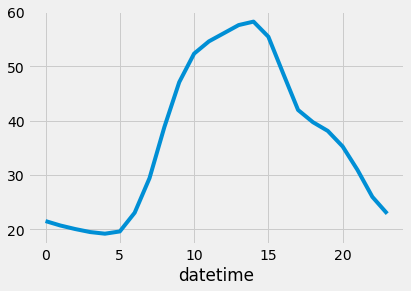

In [29]:
# Wie hoch ist die Auslastung aller Parkhäuser im Tagesverlauf? Die Grafik.
df_temp = df.copy()
df_temp['auslastung'].groupby(df_temp.index.hour).mean().plot()

In [30]:
# Wie hoch ist # Wie hoch ist die Auslastung aller Parkhäuser im Tagesverlauf? Die Daten.
df_temp = df.copy()
df_temp['auslastung'].groupby(df_temp.index.hour).mean()

datetime
0     21.544880
1     20.728693
2     20.078436
3     19.526481
4     19.225175
5     19.640228
6     23.074065
7     29.432282
8     38.819161
9     47.064493
10    52.306315
11    54.565028
12    56.056193
13    57.553470
14    58.188278
15    55.414509
16    48.635825
17    41.956229
18    39.711643
19    38.108662
20    35.253313
21    30.936739
22    25.992207
23    22.909971
Name: auslastung, dtype: float64

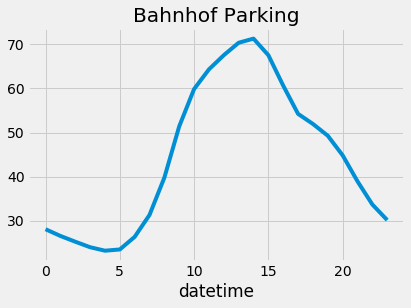

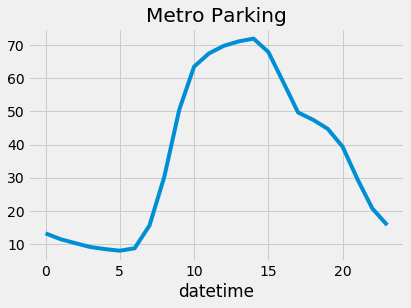

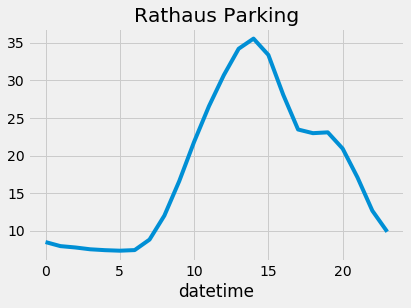

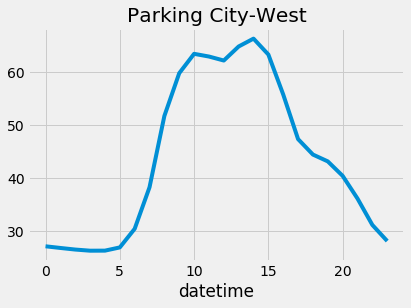

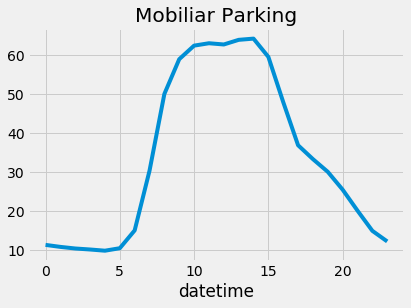

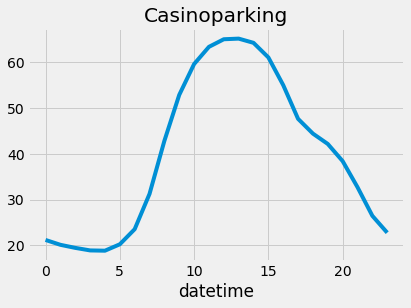

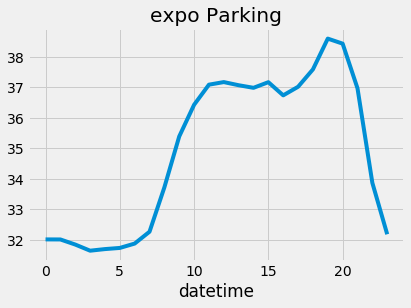

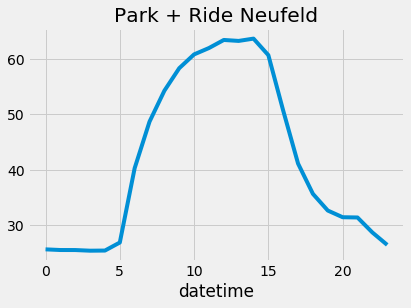

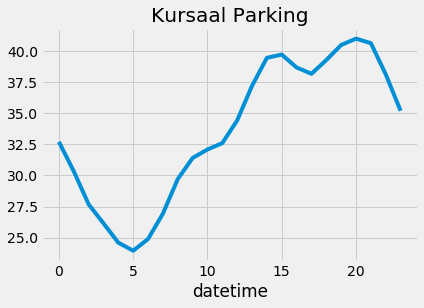

In [31]:
# Wie hoch ist die durchschnittliche Auslastung der einzelnen Parkhäuser im Tagesverlauf? Die Grafiken.

for p in df['parking'].unique():
    df_temp = df[df['parking'] == p]

    fig, ax = plt.subplots()
    df_temp.groupby(df_temp.index.hour)['auslastung'].mean().plot(title=p)
plt.show()

### Vor- und während Corona

In [32]:
# Wie hoch ist die durchschnittliche Auslastung in der Vor-Corona-Zeit? 
df.loc[:'2020-03-15']['auslastung'].mean()

41.98488715567293

In [33]:
# Wie hoch ist die durchschnittliche Auslastung während des Shutdowns? (Anfang 16. März, Ende mit Schul-
# und Ladenöffnungen am 11. Mai.)
df.loc['2020-03-16':'2020-05-10']['auslastung'].mean()

20.278857199695846

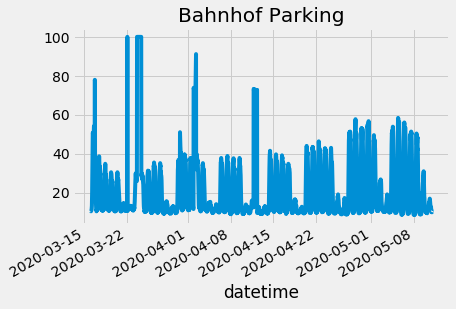

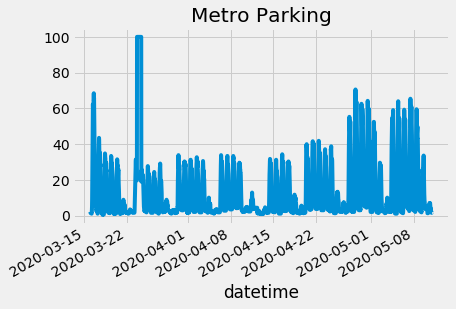

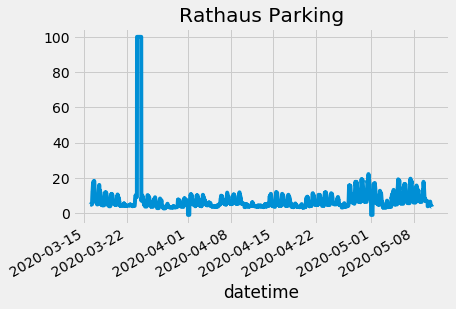

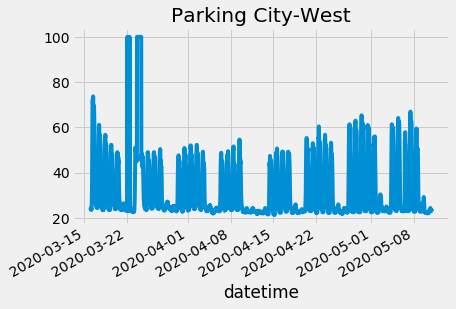

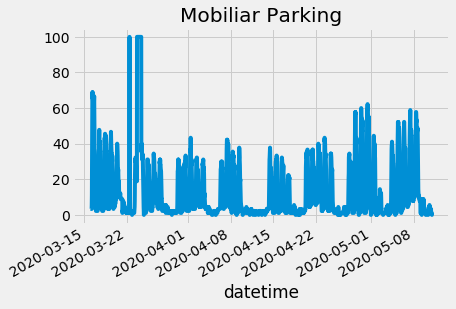

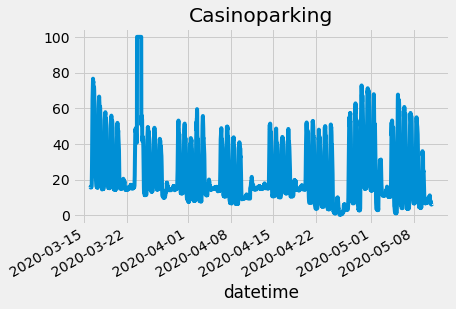

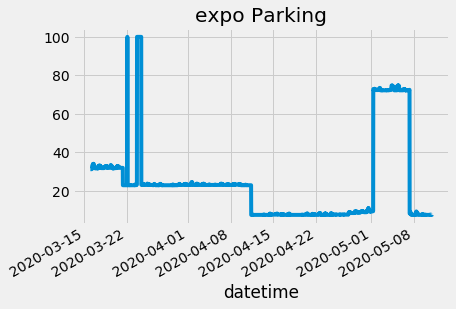

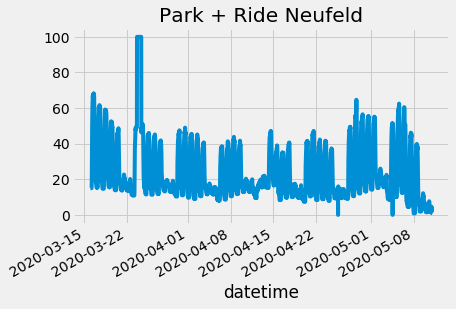

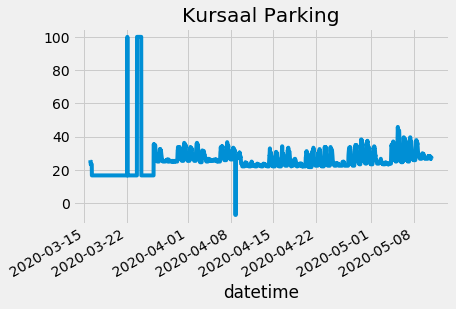

In [34]:
# Der Shutdown im Detail. 
df_temp = df.loc['2020-03-16':'2020-05-10']
for p in df_temp['parking'].unique():
    fig, ax = plt.subplots()
    df_temp[df_temp['parking'] == p]['auslastung'].plot(ax=ax, title=p)

In [35]:
# Wie hoch ist die Auslastung in der Vor-Corona-Zeit pro Wochentag?
df_temp = df.copy()
df_temp = df_temp.loc[:'2020-03-01']
df_temp.groupby(by=df_temp.index.day_name())['auslastung'].mean()

datetime
Friday       46.045510
Monday       42.034101
Saturday     42.925721
Sunday       29.469426
Thursday     46.299811
Tuesday      44.818010
Wednesday    44.208048
Name: auslastung, dtype: float64

In [36]:
# Wie hoch ist die Auslastung in der Vor-Corona-Zeit pro Wochentag unter tags (8 bis 18 Uhr)?
df_temp = df.copy()
df_temp = df_temp.loc[:'2020-03-01']
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp.groupby(by=df_temp.index.day_name())['auslastung'].mean()

datetime
Friday       65.467676
Monday       64.715220
Saturday     59.689326
Sunday       36.013879
Thursday     67.061926
Tuesday      67.231653
Wednesday    65.451994
Name: auslastung, dtype: float64

In [37]:
# Wie hoch ist die Auslastung in der Corona-Zeit pro Wochentag?
df_temp = df.copy()
df_temp = df_temp.loc['2020-03-16':'2020-05-10']
df_temp.groupby(by=df_temp.index.day_name())['auslastung'].mean()

datetime
Friday       19.769355
Monday       25.201646
Saturday     14.143093
Sunday       12.837944
Thursday     21.701603
Tuesday      26.310209
Wednesday    22.025116
Name: auslastung, dtype: float64

In [38]:
# Wie hoch ist die Auslastung in der Corona-Zeit pro Wochentag unter tags (8 bis 18 Uhr)?
df_temp = df.copy()
df_temp = df_temp.loc['2020-03-16':'2020-05-10']
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp.groupby(by=df_temp.index.day_name())['auslastung'].mean()

datetime
Friday       28.687054
Monday       34.570928
Saturday     16.008862
Sunday       13.245243
Thursday     31.981655
Tuesday      34.143308
Wednesday    32.776876
Name: auslastung, dtype: float64

In [76]:
# Wie gross sind die Abstriche, die die einzelnen Parkhäuser wegen Corona machen mussten? Unter tags. 
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]

df_temp1 = df_temp.loc[:'2020-03-15']
df_temp1 = df_temp1.groupby(by='parking')[['auslastung']].mean()
df_temp1 = df_temp1[['auslastung']]
df_temp1.columns = ['Normalbetrieb']

df_temp2 = df_temp.loc['2020-03-16':'2020-05-10']
df_temp2 = df_temp2.groupby(by='parking')[['auslastung']].mean()
df_temp2 = df_temp2[['auslastung']]
df_temp2.columns = ['Während des Shutdowns']

df_temp = pd.merge(df_temp1, df_temp2, left_index=True, right_index=True)
df_temp.index = [x.replace(' Parking', '-Parking') for x in df_temp.index]
df_temp = df_temp.sort_values(by='Normalbetrieb', ascending=False)

df_temp['minus_prozent'] = 100 - (100 * df_temp['Während des Shutdowns'] / df_temp['Normalbetrieb'])
df_temp.sort_values(by='minus_prozent')

,Normalbetrieb,Während des Shutdowns,minus_prozent
Kursaal-Parking,41.057605,27.550216,32.898629
Parking City-West,66.415777,40.545956,38.951319
Casinoparking,65.665992,35.762607,45.538618
expo-Parking,42.997258,23.267347,45.886440
Park + Ride Neufeld,66.718872,33.386122,49.960002
Bahnhof-Parking,72.282432,29.509054,59.175344
Metro-Parking,72.886120,24.546754,66.321771
Mobiliar-Parking,68.342609,21.776228,68.136674
Rathaus-Parking,32.823144,9.496400,71.067975


In [66]:
# Wie tief ist die minimale Auslastung des Metro-Parkings? 
df_temp = df[df['parking'] == 'Metro Parking']
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp['tag'] = [x.day_name() for x in df_temp.index]
df_temp.sort_values(by='auslastung')

,parking,kapazität,frei,belegt,auslastung,tag
datetime,,,,,,
2020-04-12 12:59:14,Metro Parking,425,420,5,1.176471,Sunday
2020-04-12 09:29:14,Metro Parking,425,419,6,1.411765,Sunday
2020-04-19 09:29:19,Metro Parking,425,418,7,1.647059,Sunday
2020-04-12 12:29:14,Metro Parking,425,418,7,1.647059,Sunday
2020-05-03 09:29:32,Metro Parking,425,418,7,1.647059,Sunday
...,...,...,...,...,...,...
2019-12-07 11:29:48,Metro Parking,425,0,425,100.000000,Saturday
2019-12-07 11:59:49,Metro Parking,425,0,425,100.000000,Saturday
2019-12-07 12:29:49,Metro Parking,425,0,425,100.000000,Saturday


In [68]:
# Wie tief ist die minimale Auslastung des Metro-Parkings pro Wochentag. 
df_temp[df_temp['tag'] == 'Saturday'df_temp.groupby(by='tag')['auslastung'].min()

tag
Friday       3.058824
Monday       2.352941
Saturday     2.117647
Sunday       1.176471
Thursday     3.529412
Tuesday      8.470588
Wednesday    7.764706
Name: auslastung, dtype: float64

## Exporte

### Grafik: Auslastungshitparade

In [40]:
# Wie hoch ist die durchschnittliche Auslastung unter tags (8 bis 18 Uhr) pro Parkhaus?
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp = df_temp.groupby(by='parking')['auslastung'].mean().sort_values()
df_temp.index = [x.replace(' Parking', '-Parking') for x in df_temp.index]
print(df_temp.to_csv())

chart_id = 'xriYn'

,auslastung
Rathaus-Parking,27.798304511381254
Kursaal-Parking,35.96504209418553
expo-Parking,36.78674131179618
Mobiliar-Parking,57.73373299891967
Park + Ride Neufeld,58.206459900899496
Casinoparking,59.32147228578049
Parking City-West,60.659348632349804
Bahnhof-Parking,63.01797574468262
Metro-Parking,63.39671607310554



### Grafik: Auslastung vor und während Corona

In [439]:
# Wie hoch ist die durchschnittliche Auslastung unter tags (8 bis 18 Uhr) pro Parkhaus? Vor- und während Corona.
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]

df_temp1 = df_temp.loc[:'2020-03-15']
df_temp1 = df_temp1.groupby(by='parking')[['auslastung']].mean()
df_temp1 = df_temp1[['auslastung']]
df_temp1.columns = ['Normalbetrieb']

df_temp2 = df_temp.loc['2020-03-16':'2020-05-10']
df_temp2 = df_temp2.groupby(by='parking')[['auslastung']].mean()
df_temp2 = df_temp2[['auslastung']]
df_temp2.columns = ['Während des Shutdowns']

df_temp = pd.merge(df_temp1, df_temp2, left_index=True, right_index=True)
df_temp.index = [x.replace(' Parking', '-Parking') for x in df_temp.index]
df_temp = df_temp.sort_values(by='Normalbetrieb', ascending=False)
print(df_temp.to_csv())
#chart_id = 'EnjXj'
df_temp

,Normalbetrieb,Während des Shutdowns
Metro-Parking,72.88612010964351,24.546754159831274
Bahnhof-Parking,72.28243159564178,29.50905408466469
Mobiliar-Parking,68.34260874380466,21.776228419654796
Park + Ride Neufeld,66.71887199933562,33.38612217795486
Parking City-West,66.41577663291976,40.54595571203561
Casinoparking,65.6659919908841,35.76260655671553
expo-Parking,42.997258225324124,23.267347277556432
Kursaal-Parking,41.057604735883416,27.550215803452826
Rathaus-Parking,32.82314404983562,9.496400363458456



,Normalbetrieb,Während des Shutdowns
Metro-Parking,72.886120,24.546754
Bahnhof-Parking,72.282432,29.509054
Mobiliar-Parking,68.342609,21.776228
Park + Ride Neufeld,66.718872,33.386122
Parking City-West,66.415777,40.545956
Casinoparking,65.665992,35.762607
expo-Parking,42.997258,23.267347
Kursaal-Parking,41.057605,27.550216
Rathaus-Parking,32.823144,9.496400


### Grafik: Auslastung im Laufe der Zeit 

In [96]:
# Die durchschnittliche Auslastung pro Tag aller Parkhäuser im Verlauf der Zeit.
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp = df_temp.resample('W',)['auslastung'].mean()
print(df_temp.to_csv())

datetime,auslastung
2019-07-07,52.523599200120664
2019-07-14,59.97508880387653
2019-07-21,55.292939418196625
2019-07-28,55.7943178417914
2019-08-04,54.85804808884583
2019-08-11,62.04248946748958
2019-08-18,64.62760997005739
2019-08-25,64.21370386909719
2019-09-01,63.96103312077706
2019-09-08,64.33890260494606
2019-09-15,59.30776119780665
2019-09-22,54.399318851748745
2019-09-29,54.353605986399046
2019-10-06,56.03970067036103
2019-10-13,59.80129271093176
2019-10-20,62.77435990498325
2019-10-27,68.94847357318014
2019-11-03,69.76981754732226
2019-11-10,65.8491006595046
2019-11-17,70.24340553488597
2019-11-24,67.26920951878182
2019-12-01,72.78349866689963
2019-12-08,71.27346812503288
2019-12-15,73.60776417432442
2019-12-22,69.79440228259857
2019-12-29,45.87419731410895
2020-01-05,40.29288497374103
2020-01-12,54.86738161977712
2020-01-19,58.68653028462904
2020-01-26,60.92820111845433
2020-02-02,57.20610485306429
2020-02-09,53.00308045612839
2020-02-16,59.241234831258346
2020-02-23,
2020-03-

In [475]:
# Die durchschnittliche Auslastung pro Tag aller Parkhäuser im Verlauf der Zeit. Unterschiedliche Samplings.
df_temp = df.copy()
df_temp = df_temp[(df_temp.index.hour > 8) & (df_temp.index.hour < 18)]
df_temp = df_temp.resample('W',)['auslastung'].mean()
df_temp = df_temp.loc[:'2020-05']
print(df_temp.to_csv())

datetime,auslastung
2019-07-07,52.523599200120664
2019-07-14,59.97508880387653
2019-07-21,55.292939418196625
2019-07-28,55.7943178417914
2019-08-04,54.85804808884583
2019-08-11,62.04248946748958
2019-08-18,64.62760997005739
2019-08-25,64.21370386909719
2019-09-01,63.96103312077706
2019-09-08,64.33890260494606
2019-09-15,59.30776119780665
2019-09-22,54.399318851748745
2019-09-29,54.353605986399046
2019-10-06,56.03970067036103
2019-10-13,59.80129271093176
2019-10-20,62.77435990498325
2019-10-27,68.94847357318014
2019-11-03,69.76981754732226
2019-11-10,65.8491006595046
2019-11-17,70.24340553488597
2019-11-24,67.26920951878182
2019-12-01,72.78349866689963
2019-12-08,71.27346812503288
2019-12-15,73.60776417432442
2019-12-22,69.79440228259857
2019-12-29,45.87419731410895
2020-01-05,40.29288497374103
2020-01-12,54.86738161977712
2020-01-19,58.68653028462904
2020-01-26,60.92820111845433
2020-02-02,57.20610485306429
2020-02-09,53.00308045612839
2020-02-16,59.241234831258346
2020-02-23,
2020-03-

### Grafik: Belegung Tagesverlauf

In [97]:
# Wie hoch ist die durchschnittliche Auslastung der einzelnen Parkhäuser im Tagesverlauf? Die Grafiken.
df_temp = pd.DataFrame()

for p in df['parking'].unique():
    df_temp_1 = df[df['parking'] == p]
    df_temp_1 = df_temp_1.groupby(df_temp_1.index.hour)['auslastung'].mean()
    df_temp[p] = df_temp_1
df_temp.columns = [x.replace(' Parking', '-Parking') for x in df_temp.columns]
print(df_temp.to_csv())

datetime,Bahnhof-Parking,Metro-Parking,Rathaus-Parking,Parking City-West,Mobiliar-Parking,Casinoparking,expo-Parking,Park + Ride Neufeld,Kursaal-Parking
0,28.04976985992912,13.242477188895387,8.494301789525592,27.106838590835856,11.417308397506448,21.19765874037524,32.01595159515954,25.678767876787706,32.703869047619065
1,26.52046977272975,11.50533876917105,7.9564308517966165,26.791004681863527,10.905757242390926,20.137855431952712,32.014118078474525,25.559405940594065,30.336309523809508
2,25.215514862523033,10.291982139390425,7.777288618154016,26.49052114513776,10.495049504950531,19.46732196069511,31.847268060139342,25.554730473047336,27.681354916067093
3,23.96188615517067,9.144243836148336,7.535573884067183,26.27484841507406,10.238357169050275,18.91259031482266,31.64558122478914,25.437568756875727,26.151785714285676
4,23.17295274677967,8.498932246165799,7.417202246540449,26.28559367564665,9.932159882654977,18.85162173129051,31.698294829482943,25.463421342134243,24.595238095238077
5,2

### Grafik: Belegung Wochenverlauf

In [496]:
# Wie hoch ist die durchschnittliche Auslastung der einzelnen Parkhäuser im Tagesverlauf? Die Grafiken.
df_temp = pd.DataFrame()

for p in df['parking'].unique():
    df_temp_1 = df[df['parking'] == p]
    df_temp_1 = df_temp_1.loc[:'2020-03-15']
    df_temp_1 = df_temp_1[(df_temp_1.index.hour > 8) & (df_temp_1.index.hour < 18)]
    df_temp_1 = df_temp_1.groupby(df_temp_1.index.day_name())['auslastung'].mean()
    df_temp[p] = df_temp_1
df_temp.columns = [x.replace(' Parking', '-Parking') for x in df_temp.columns]
print(df_temp.to_csv())
df_temp.sort_index()

datetime,Bahnhof-Parking,Metro-Parking,Rathaus-Parking,Parking City-West,Mobiliar-Parking,Casinoparking,expo-Parking,Park + Ride Neufeld,Kursaal-Parking
Friday,77.05370314065974,81.17647058823516,33.27540885768351,72.42580847232013,75.64534231200906,71.9180666941861,44.11592779648337,71.77216610549938,42.600308641975296
Monday,72.77092623560014,75.79697712418303,29.860806530214443,76.15511950904403,83.798225308642,67.4384772565742,40.83863811728388,77.45312499999993,41.99331275720166
Saturday,76.85213337387249,83.39156268568024,50.64268415145612,52.58828596037899,50.97081930415265,68.83045092000322,44.000187055742614,51.22390572390573,34.508744855967095
Sunday,46.7683170997197,34.7870250967166,19.8358036744475,36.54613906427702,22.332771219786395,37.91318042406612,47.81080194866024,37.54553119730184,35.65046296296295
Thursday,78.16107454957383,78.17162133670679,32.6979186317047,75.15295490539299,83.18000796495436,72.12516526430822,44.28564317005179,77.06212664277193,50.24016203703707
T

,Bahnhof-Parking,Metro-Parking,Rathaus-Parking,Parking City-West,Mobiliar-Parking,Casinoparking,expo-Parking,Park + Ride Neufeld,Kursaal-Parking
datetime,,,,,,,,,
Friday,77.053703,81.176471,33.275409,72.425808,75.645342,71.918067,44.115928,71.772166,42.600309
Monday,72.770926,75.796977,29.860807,76.155120,83.798225,67.438477,40.838638,77.453125,41.993313
Saturday,76.852133,83.391563,50.642684,52.588286,50.970819,68.830451,44.000187,51.223906,34.508745
Sunday,46.768317,34.787025,19.835804,36.546139,22.332771,37.913180,47.810802,37.545531,35.650463
Thursday,78.161075,78.171621,32.697919,75.152955,83.180008,72.125165,44.285643,77.062127,50.240162
Tuesday,77.889260,80.628322,31.054906,78.366064,85.014403,72.739082,39.996135,78.554630,43.081597
Wednesday,77.644418,77.583808,32.068792,76.125281,81.031462,70.001758,39.462117,75.959677,41.189236
